In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(readxl)

In [5]:
beanurl<-"https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
temp <- tempfile()
download.file(beanurl,temp)
beanzip <- unzip(temp, "DryBeanDataset/Dry_Bean_Dataset.xlsx")
bean <- read_excel(beanzip)
bean

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
42139,759.321,281.5399,191.1880,1.472582,0.7340648,42569,231.6313,0.7299324,0.9898988,0.9184241,0.8227297,0.006681220,0.001888271,0.6768842,0.9967673,DERMASON
42147,763.779,283.3826,190.2757,1.489326,0.7410548,42667,231.6532,0.7053891,0.9878126,0.9079065,0.8174575,0.006723673,0.001852025,0.6682367,0.9952224,DERMASON
42159,772.237,295.1427,182.2047,1.619841,0.7866930,42600,231.6862,0.7889625,0.9896479,0.8883804,0.7849972,0.007000705,0.001639812,0.6162206,0.9981796,DERMASON


In [11]:
#Standaridized the dataset
bean_data_recipe <- recipe(Class ~., data = bean) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

bean_data_scaled <- bean_data_recipe |>  
                            prep() |> 
                            bake(bean)
bean_data_scaled

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.8407176,-1.143277,-1.306550,-0.6311299,-1.564995,-2.185640,-0.8414197,-1.063302,0.2890768,0.3675999,1.4238148,1.839049,0.6807614,2.402085,1.925653,0.8383402,SEKER
-0.8291572,-1.013887,-1.395860,-0.4344286,-1.969712,-3.685904,-0.8260712,-1.044178,0.6974512,-0.4628896,0.2310455,2.495358,0.3679534,3.100779,2.689603,0.7711101,SEKER
-0.8071275,-1.078789,-1.252311,-0.5857131,-1.514236,-2.045261,-0.8086740,-1.008047,0.5781740,0.5183978,1.2528189,1.764778,0.6031067,2.235009,1.841288,0.9167215,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.3720246,-0.4478165,-0.4504616,-0.2464468,-0.4486011,-0.1829329,-0.3761287,-0.3621832,-0.4033776,0.5913487,0.7584399,0.3705192,0.1042656,0.2891938,0.3363159,0.39023681,DERMASON
-0.3717518,-0.4270129,-0.4289583,-0.2667325,-0.3807213,-0.1069560,-0.3728373,-0.3618117,-0.9033805,0.1437118,0.5817320,0.2850880,0.1419012,0.2283670,0.2489643,0.03643867,DERMASON
-0.3713426,-0.3875429,-0.2917249,-0.4462076,0.1483689,0.3891022,-0.3750875,-0.3612544,0.7991977,0.5375193,0.2536721,-0.2408954,0.3874979,-0.1277712,-0.2764712,0.71369326,DERMASON


In [20]:
##Creating training and testing dataset
set.seed(2022)
bean_split <- initial_split(bean, prop = 0.75, strata = Class)
bean_train <- training(bean_split)
bean_test <- testing(bean_split)

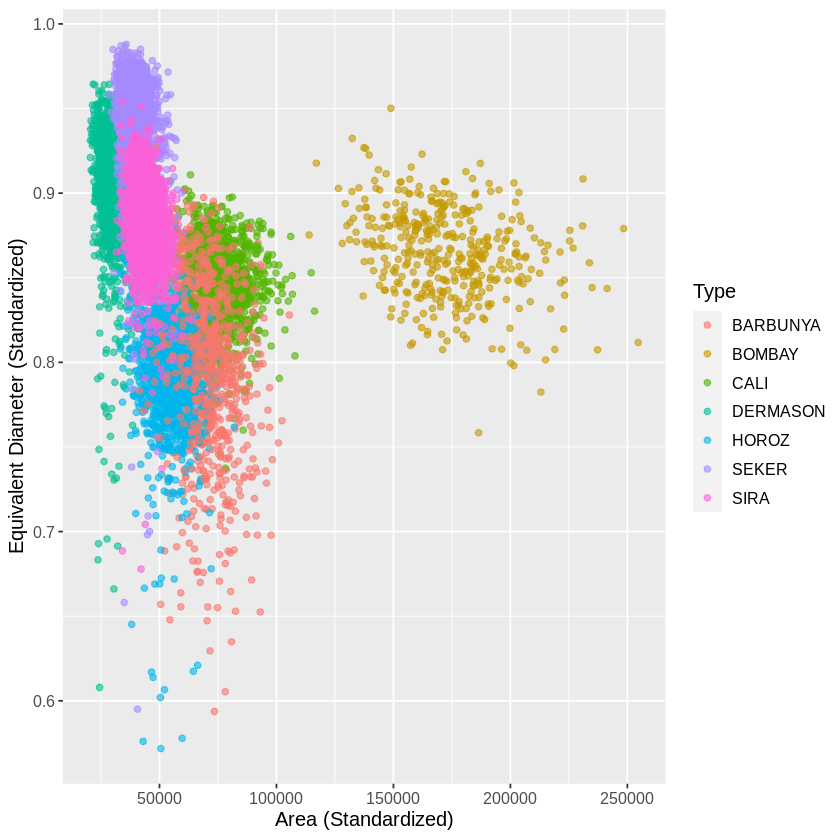

In [21]:
#Graphing the training dataset
area_ecc <- bean_train |>
  ggplot(aes(x = Area, y = roundness, color = Class)) +
  geom_point(alpha = 0.6) +
  labs(x = "Area (Standardized)", 
       y = "Equivalent Diameter (Standardized)",
       color = "Type") +
  theme(text = element_text(size = 12))
area_ecc